In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

## 건국대 충주 실습농장 평사

### 2021-06-07 ~ 2021-06-30 기간 동안 수집된 데이터

In [56]:
# 데이터 로드
df = pd.read_csv("data/Sensor/Sensor_data.csv")
df.shape

(38924, 7)

In [57]:
df.head()

,수집시간,수집장비ID,축사번호,모듈ID,센서타입,측정값,센서시간
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.89995,20210630235847
1,2021-06-30 23:58:48,GW01,1,1,temp,21.09999,20210630235847
2,2021-06-30 23:58:21,GW01,1,1,co2,402.89000,20210630235819
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.38000,20210630235819
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.89994,20210630235647


In [58]:
# 데이터 컬럼 이름 지정
df.columns = ['Time','Collecting device ID', 'Barn number', 'Module ID', 'Type', 'Value', 'Sensor time']
df

,Time,Collecting device ID,Barn number,Module ID,Type,Value,Sensor time
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.899950,20210630235847
1,2021-06-30 23:58:48,GW01,1,1,temp,21.099990,20210630235847
2,2021-06-30 23:58:21,GW01,1,1,co2,402.890000,20210630235819
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.380000,20210630235819
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.899940,20210630235647
...,...,...,...,...,...,...,...
38919,2021-06-10 12:27:16,GW01,1,1,humidity,45.639000,20210610122714
38920,2021-06-10 12:23:31,GW01,1,1,nh3,11.934230,20210610122330
38921,2021-06-10 12:23:31,GW01,1,1,co2,409.215100,20210610122330
38922,2021-06-10 12:16:58,GW01,1,1,co2,402.246300,20210610121657


In [59]:
df.isnull().sum()

Time                    0
Barn number             0
Module ID               0
Type                    0
Value                   0
Sensor time             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38924 entries, 0 to 38923
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  38924 non-null  object 
 1   Collecting device ID  38924 non-null  object 
 2   Barn number           38924 non-null  int64  
 3   Module ID             38924 non-null  int64  
 4   Type                  38924 non-null  object 
 5   Value                 38924 non-null  float64
 6   Sensor time           38924 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [61]:
df['Time'] = pd.to_datetime(df['Time'])

In [62]:
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month
df["day"] = df["Time"].dt.day
df["hour"] = df["Time"].dt.hour
df["minute"] = df["Time"].dt.minute
df["second"] = df["Time"].dt.second

df.shape

(38924, 13)

In [63]:
df.head()

,Time,Collecting device ID,Barn number,Module ID,Type,Value,Sensor time,year,month,day,hour,minute,second
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.89995,20210630235847,2021,6,30,23,58,48
1,2021-06-30 23:58:48,GW01,1,1,temp,21.09999,20210630235847,2021,6,30,23,58,48
2,2021-06-30 23:58:21,GW01,1,1,co2,402.89000,20210630235819,2021,6,30,23,58,21
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.38000,20210630235819,2021,6,30,23,58,21
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.89994,20210630235647,2021,6,30,23,56,48


In [64]:
data = df[['Time', 'Collecting device ID', 'Type', 'Value']]

In [65]:
data

,Time,Collecting device ID,Type,Value
0,2021-06-30 23:58:48,GW01,humidity,99.899950
1,2021-06-30 23:58:48,GW01,temp,21.099990
2,2021-06-30 23:58:21,GW01,co2,402.890000
3,2021-06-30 23:58:21,GW01,nh3,4.380000
4,2021-06-30 23:56:48,GW01,humidity,99.899940
...,...,...,...,...
38919,2021-06-10 12:27:16,GW01,humidity,45.639000
38920,2021-06-10 12:23:31,GW01,nh3,11.934230
38921,2021-06-10 12:23:31,GW01,co2,409.215100
38922,2021-06-10 12:16:58,GW01,co2,402.246300


In [66]:
# pivot 사용으로 데이터 재구조화
pivoted = data.pivot(['Time','Collecting device ID'], 'Type', 'Value')

#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [67]:
pivoted

Type,Time,Collecting device ID,co2,humidity,nh3,temp
0,2021-06-10 12:16:58,GW01,402.2463,NaN,3.526615,NaN
1,2021-06-10 12:23:31,GW01,409.2151,NaN,11.934230,NaN
2,2021-06-10 12:27:16,GW01,NaN,45.63900,NaN,28.95933
3,2021-06-10 12:56:05,GW01,NaN,48.82544,NaN,29.32883
4,2021-06-10 12:58:39,GW01,404.0543,NaN,5.793288,NaN
...,...,...,...,...,...,...
18936,2021-06-30 23:54:48,GW01,NaN,99.89994,NaN,21.10168
18937,2021-06-30 23:56:21,GW01,402.8900,NaN,4.390000,NaN
18938,2021-06-30 23:56:48,GW01,NaN,99.89994,NaN,21.10338
18939,2021-06-30 23:58:21,GW01,402.8900,NaN,4.380000,NaN


In [68]:
pivoted_sorted = pivoted.sort_values(by='Time' ,ascending=True)

In [69]:
pivoted_sorted["year"] = pivoted_sorted["Time"].dt.year
pivoted_sorted["month"] = pivoted_sorted["Time"].dt.month
pivoted_sorted["day"] = pivoted_sorted["Time"].dt.day
pivoted_sorted["hour"] = pivoted_sorted["Time"].dt.hour
pivoted_sorted

Type,Time,Collecting device ID,co2,humidity,nh3,temp,year,month,day,hour
0,2021-06-10 12:16:58,GW01,402.2463,NaN,3.526615,NaN,2021,6,10,12
1,2021-06-10 12:23:31,GW01,409.2151,NaN,11.934230,NaN,2021,6,10,12
2,2021-06-10 12:27:16,GW01,NaN,45.63900,NaN,28.95933,2021,6,10,12
3,2021-06-10 12:56:05,GW01,NaN,48.82544,NaN,29.32883,2021,6,10,12
4,2021-06-10 12:58:39,GW01,404.0543,NaN,5.793288,NaN,2021,6,10,12
...,...,...,...,...,...,...,...,...,...,...
18936,2021-06-30 23:54:48,GW01,NaN,99.89994,NaN,21.10168,2021,6,30,23
18937,2021-06-30 23:56:21,GW01,402.8900,NaN,4.390000,NaN,2021,6,30,23
18938,2021-06-30 23:56:48,GW01,NaN,99.89994,NaN,21.10338,2021,6,30,23
18939,2021-06-30 23:58:21,GW01,402.8900,NaN,4.380000,NaN,2021,6,30,23


In [70]:
# grouped_df = pivoted_sorted.groupby(pd.Grouper(key='Time' ,freq='1h'))[['Collecting device ID','co2','humidity','temp']]. \
# agg({'Collecting device ID' : 'max','co2' : ['mean','median','std'],'humidity' : ['mean','median','std'],
#      'temp' : ['mean','median','std']})


# 1시간으로 그룹화
grouped_df_mean = pivoted_sorted.groupby(pd.Grouper(key='Time' ,freq='1h')).mean()

In [71]:
grouped_df_mean

Type,co2,humidity,nh3,temp,year,month,day,hour
Time,,,,,,,,
2021-06-10 12:00:00,405.171900,47.232220,7.084711,29.144080,2021.0,6.0,10.0,12.0
2021-06-10 13:00:00,400.118973,43.524103,0.248011,30.132948,2021.0,6.0,10.0,13.0
2021-06-10 14:00:00,400.041593,41.219764,0.112365,30.595464,2021.0,6.0,10.0,14.0
2021-06-10 15:00:00,400.053593,42.046431,0.139830,30.239883,2021.0,6.0,10.0,15.0
2021-06-10 16:00:00,400.197657,45.121034,0.391541,29.507565,2021.0,6.0,10.0,16.0
...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,402.696667,99.781939,4.131667,24.828546,2021.0,6.0,30.0,19.0
2021-06-30 20:00:00,402.187333,99.899941,3.445667,23.243017,2021.0,6.0,30.0,20.0
2021-06-30 21:00:00,402.005333,99.899941,3.198000,22.113639,2021.0,6.0,30.0,21.0


In [72]:
# co2, humidity, nh3, temp로 각각 dataframe 형태로 분리
co2_data = pd.DataFrame(grouped_df_mean['co2'], columns=['co2'])
humidity_data = pd.DataFrame(grouped_df_mean['humidity'], columns=['humidity'])
nh3_data = pd.DataFrame(grouped_df_mean['nh3'], columns=['nh3'])
temp_data = pd.DataFrame(grouped_df_mean['temp'], columns=['temp'])

# co2, humidity, nh3, temp로 각각 결측치 제거
co2_data = co2_data.dropna(axis=0)
humidity_data = humidity_data.dropna(axis=0)
nh3_data = nh3_data.dropna(axis=0)
temp_data = temp_data.dropna(axis=0)

co2_data_reset_index = co2_data.reset_index()
humidity_data_reset_index = humidity_data.reset_index()
nh3_data_reset_index = nh3_data.reset_index()
temp_data_reset_index = temp_data.reset_index()

#humidity_data_reset_index = humidity_data_reset_index.set_index('Time')

#co2_data_reset_index['year'] = co2_data_reset_index['Time'].dt.year

# yyyy-mm-dd 형태로 각각 새로운 칼럼 Date 지정
co2_data_reset_index['Date'] = pd.to_datetime(co2_data_reset_index['Time'].dt.year.astype(str) + co2_data_reset_index['Time'].dt.month.astype(str) + co2_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
humidity_data_reset_index['Date'] = pd.to_datetime(humidity_data_reset_index['Time'].dt.year.astype(str) + humidity_data_reset_index['Time'].dt.month.astype(str) + humidity_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
nh3_data_reset_index['Date'] = pd.to_datetime(nh3_data_reset_index['Time'].dt.year.astype(str) + nh3_data_reset_index['Time'].dt.month.astype(str) + nh3_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
temp_data_reset_index['Date'] = pd.to_datetime(temp_data_reset_index['Time'].dt.year.astype(str) + temp_data_reset_index['Time'].dt.month.astype(str) + temp_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')


# co2와 nh3의 너무 높은 값 제거
co2_high_data_remove = co2_data_reset_index[co2_data_reset_index['co2'] <= 500]
nh3_high_data_remove = nh3_data_reset_index[nh3_data_reset_index['nh3'] <= 300]


co2_df = co2_high_data_remove.set_index("Date")
humidity_df = humidity_data_reset_index.set_index("Date")
nh3_df = nh3_high_data_remove.set_index("Date")
temp_df = temp_data_reset_index.set_index("Date")



Text(0, 0.5, 'Value')

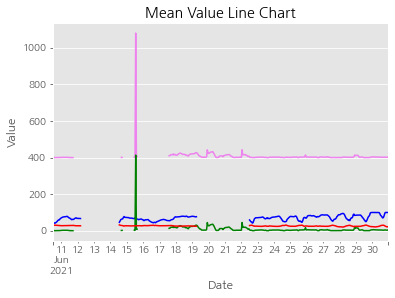

In [73]:
# 결측치 제거 안한 그래프

ax_line = grouped_df_mean['co2'].plot.line(color='violet')
ax_line = grouped_df_mean['humidity'].plot.line(color='blue')
ax_line = grouped_df_mean['nh3'].plot.line(color='green')
ax_line = grouped_df_mean['temp'].plot.line(color='red')

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")


Text(0, 0.5, 'Value')

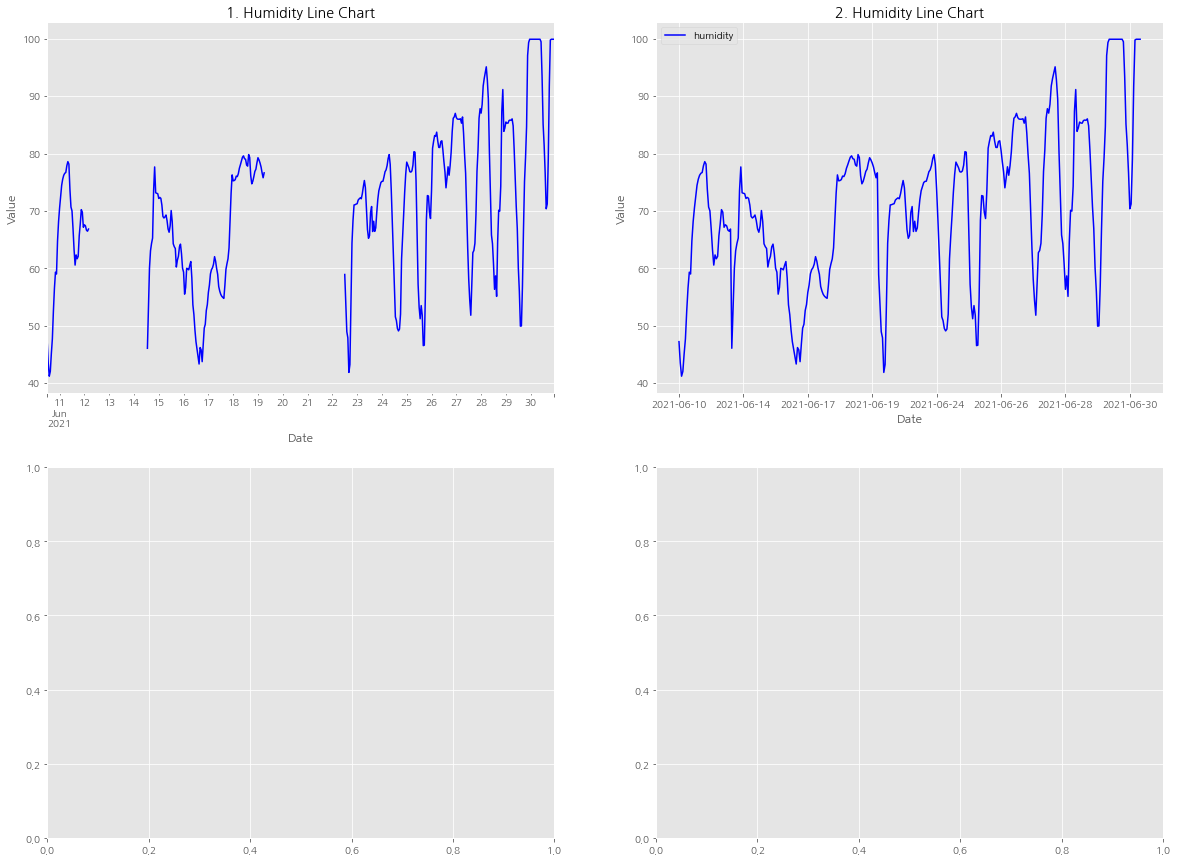

In [74]:
# 1번에 결측치가 존재하는 것을 위의 과정에서 결측치를 제거하고 Date로 묶어 출력한 결과가 2번

fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax_line = grouped_df_mean['humidity'].plot.line(color='blue', ax=ax[0, 0])

ax_line.set_title('1. Humidity Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")
                                                
                                                
humidity_line = humidity_data_reset_index.plot.line(x='Date',y='humidity',color='blue', ax=ax[0, 1])

humidity_line.set_title('2. Humidity Line Chart')
humidity_line.set_xlabel("Date")
humidity_line.set_ylabel("Value")

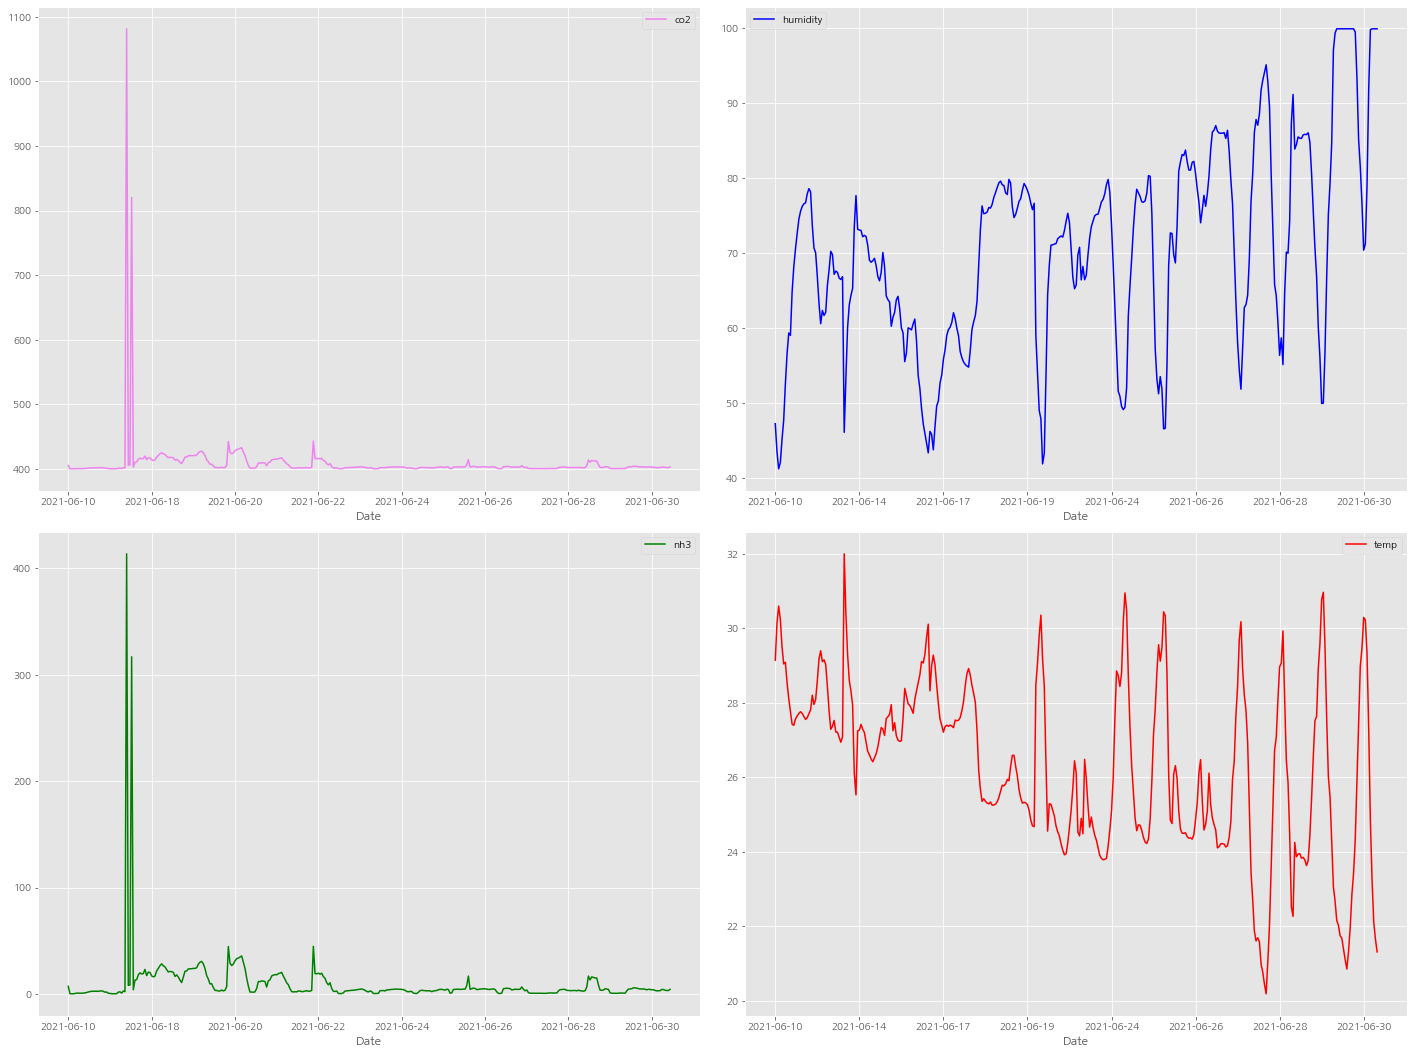

In [75]:
# 결측치 제거하고 모든 센서 데이터 출력, 하지만 co2와 nh3의 값이 너무 높다.

fig, ax = plt.subplots(2, 2, figsize=(20,15))

co2_data_reset_index.plot.line(x='Date',y='co2', color='violet', ax=ax[0, 0])
plt.tight_layout(pad=2, h_pad=1)

humidity_line = humidity_data_reset_index.plot.line(x='Date',y='humidity', color='blue', ax=ax[0, 1])
plt.tight_layout(pad=2, h_pad=1)

nh3_line = nh3_data_reset_index.plot.line(x='Date',y='nh3', color='green', ax=ax[1, 0])
plt.tight_layout(pad=2, h_pad=1)

temp_data_reset_index.plot.line(x='Date',y='temp', color='red', ax=ax[1, 1])
plt.tight_layout(pad=2, h_pad=1)



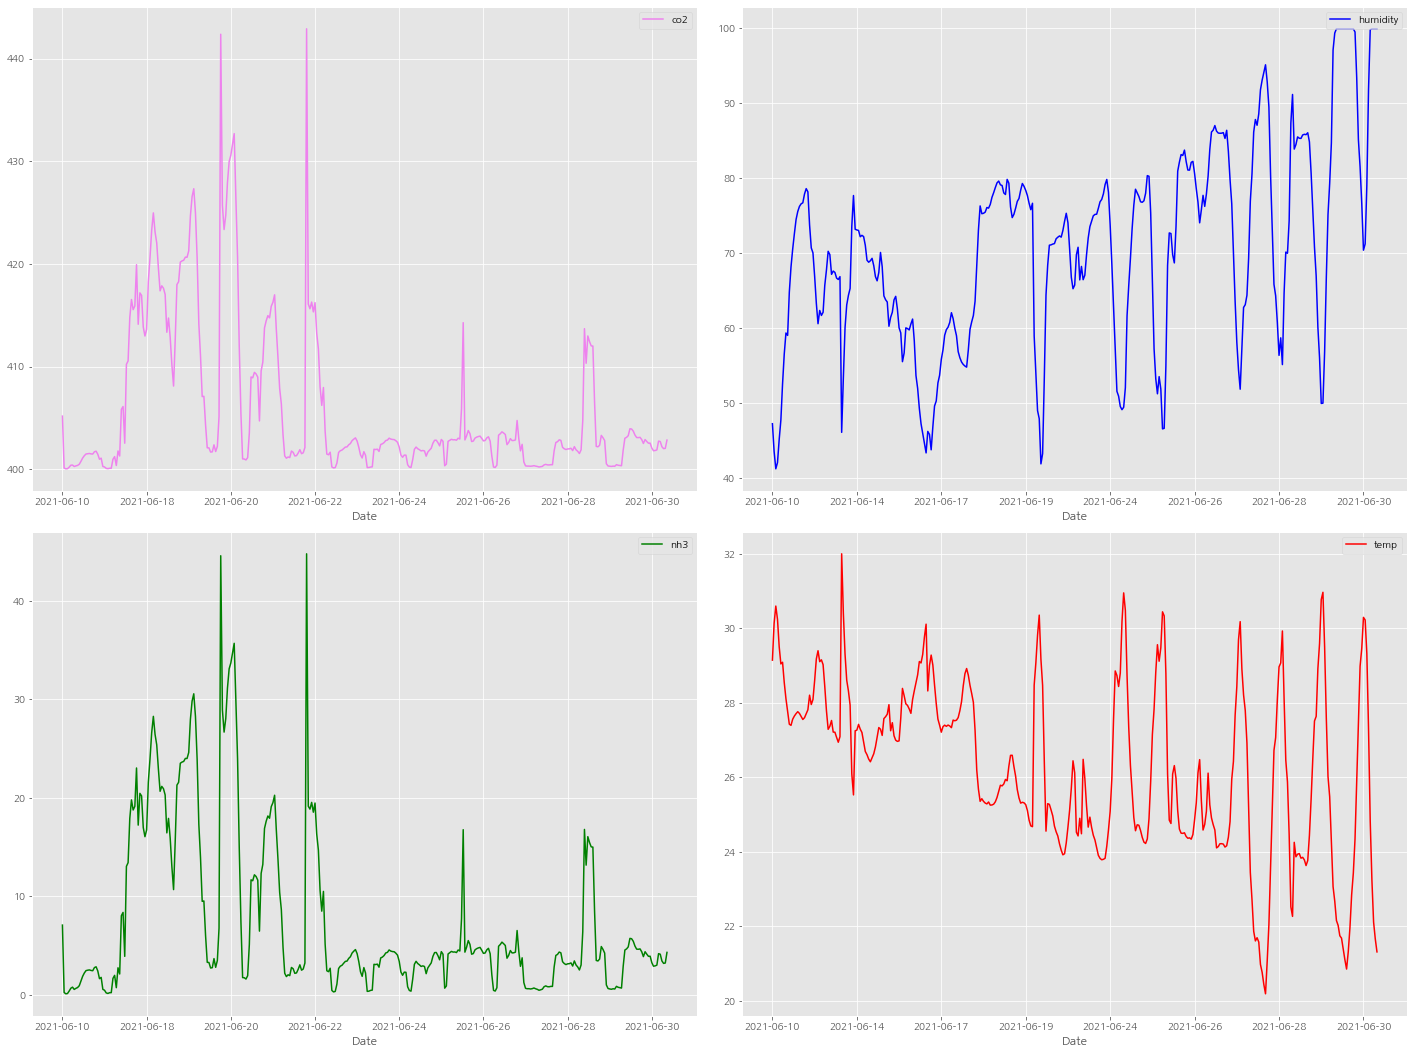

In [76]:
# co2와 nh3의 너무 높은 값을 제거하고 출력한 결과 

fig, ax = plt.subplots(2, 2, figsize=(20,15))

co2_high_data_remove.plot.line(x='Date',y='co2', color='violet', ax=ax[0, 0])
plt.tight_layout(pad=2, h_pad=1)
plt.xticks(rotation=45)

humidity_line = humidity_data_reset_index.plot.line(x='Date',y='humidity', color='blue', ax=ax[0, 1])
plt.tight_layout(pad=2, h_pad=1)

nh3_line = nh3_high_data_remove.plot.line(x='Date',y='nh3', color='green', ax=ax[1, 0])
plt.tight_layout(pad=2, h_pad=1)

temp_data_reset_index.plot.line(x='Date',y='temp', color='red', ax=ax[1, 1])
plt.tight_layout(pad=2, h_pad=1)


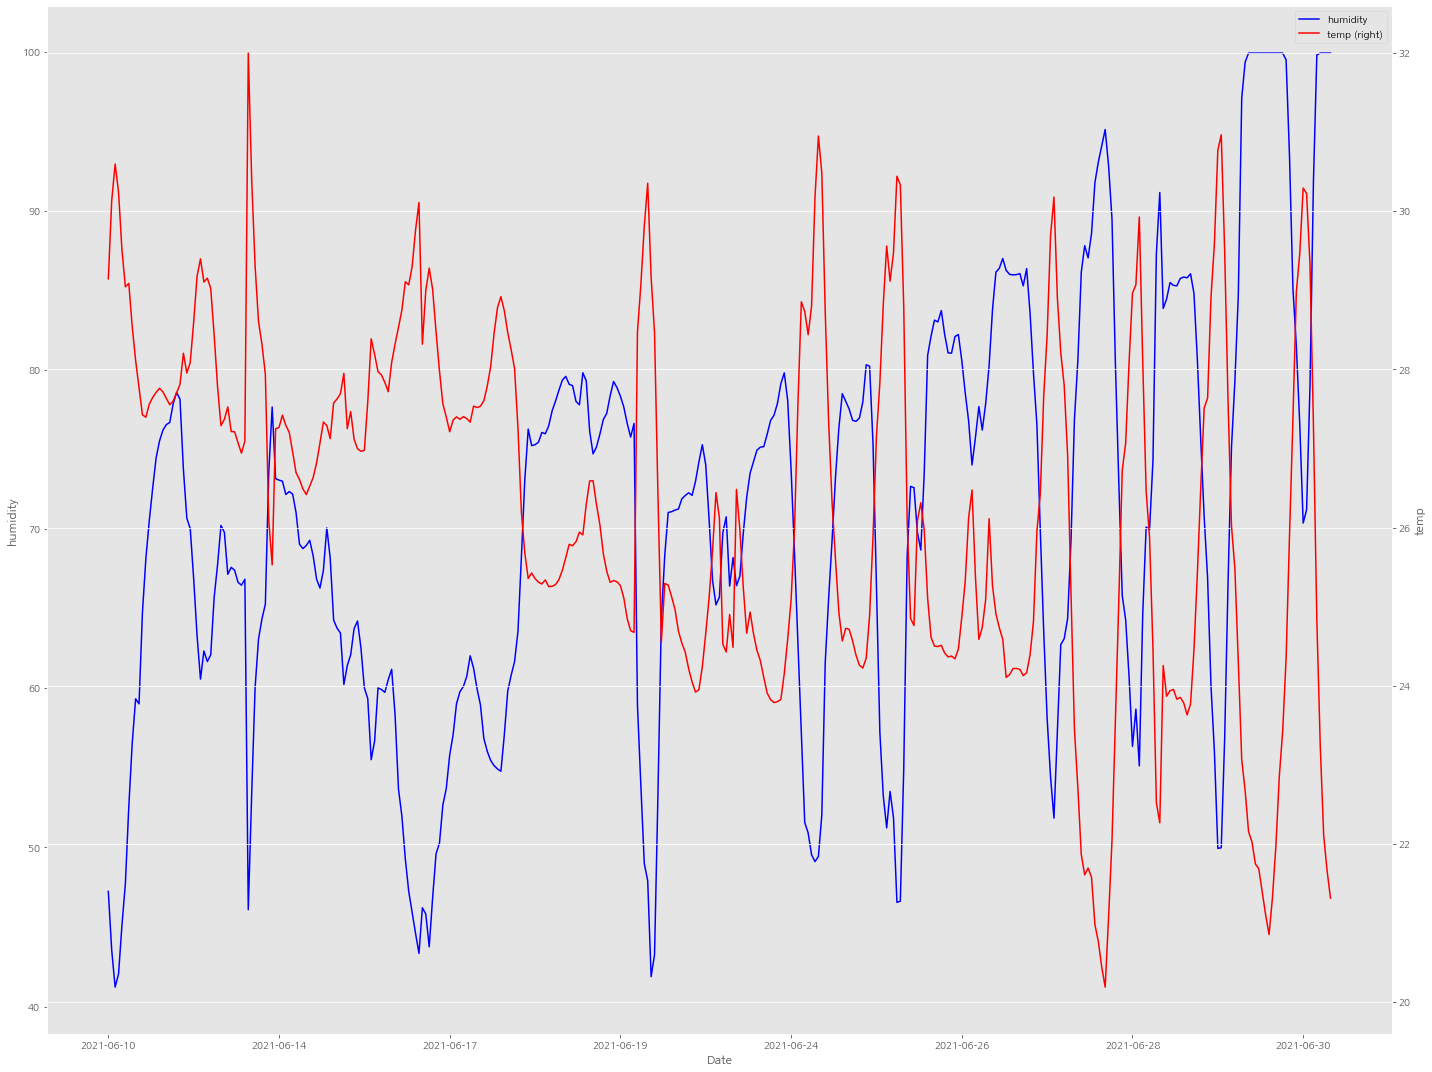

In [77]:
# 온도와 습도의 음의관계를 볼 수 있음

humidity_line = humidity_data_reset_index.plot.line(x='Date',y='humidity', color='blue',figsize=(20,15))

temp_line = temp_data_reset_index.plot.line(x='Date',y='temp',secondary_y=True, color='red',ax = humidity_line)

humidity_line.set_ylabel('humidity')
temp_line.set_ylabel('temp')
plt.tight_layout()
plt.show()

In [78]:
# 06-29 ~ 07-01 까지 시간별로 출력한 결과

humidity_data_reset_index = humidity_data_reset_index.query('"2021-06-29" <= Time <= "2021-07-01"')
temp_data_reset_index = temp_data_reset_index.query('"2021-06-29" <= Time <= "2021-07-01"')

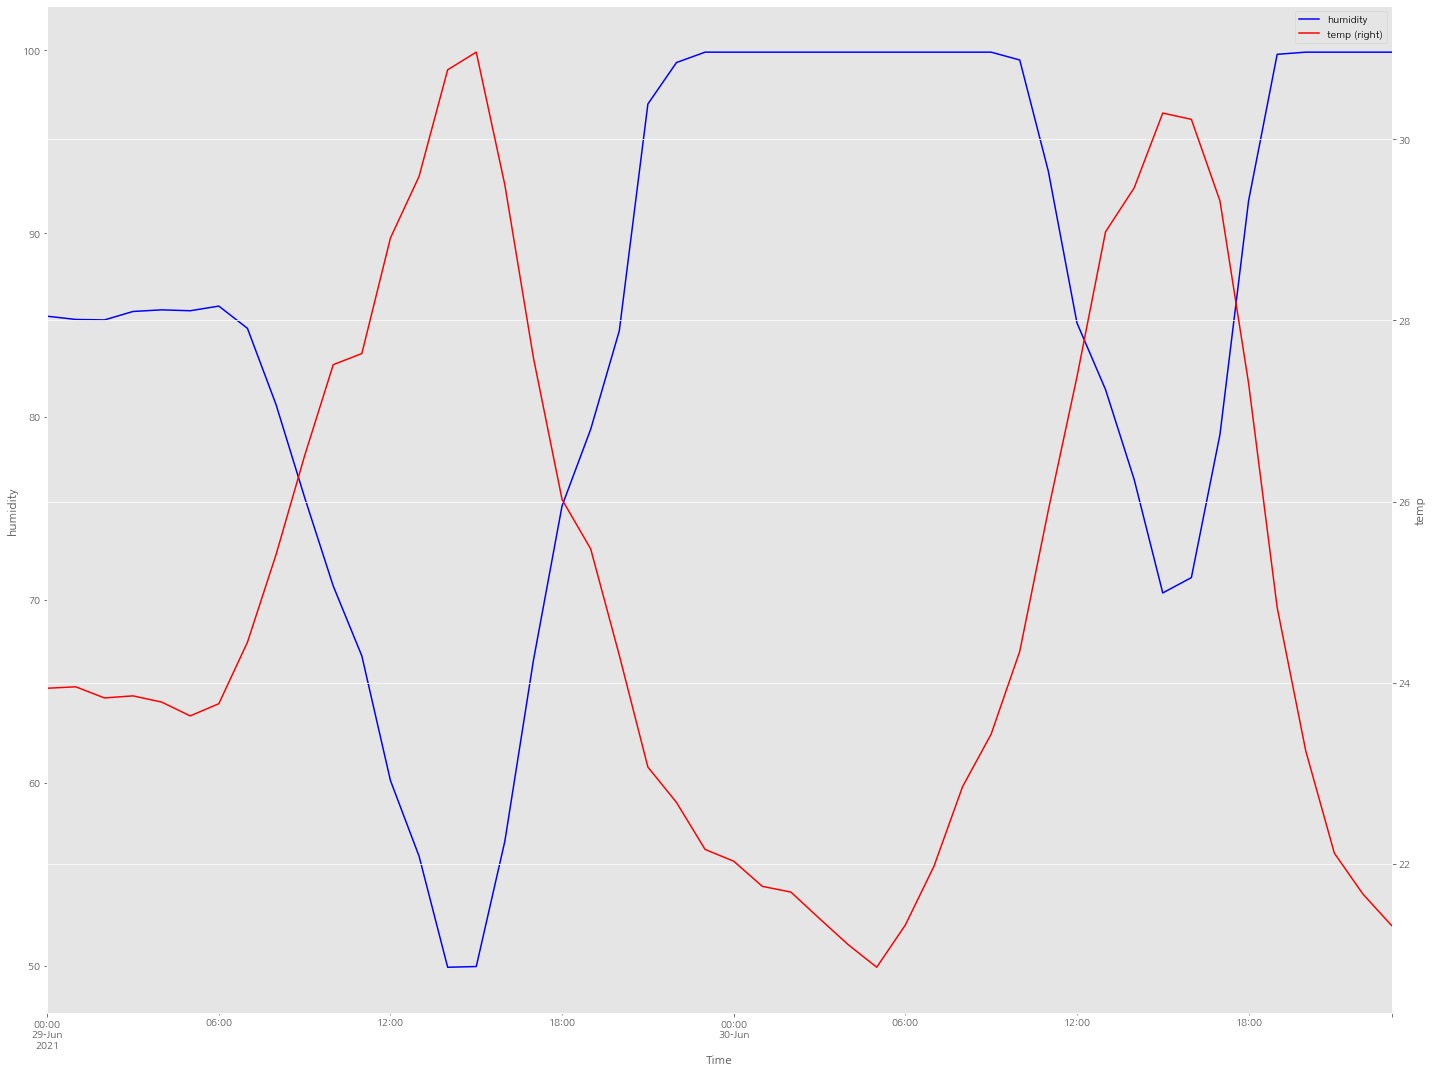

In [79]:
humidity_line = humidity_data_reset_index.plot.line(x='Time',y='humidity', color='blue',figsize=(20,15))

temp_line = temp_data_reset_index.plot.line(x='Time',y='temp',secondary_y=True, color='red',ax = humidity_line)

humidity_line.set_ylabel('humidity')
temp_line.set_ylabel('temp')
plt.tight_layout()
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:title={'center':'nh3 ----- temp'}, xlabel='nh3', ylabel='temp'>

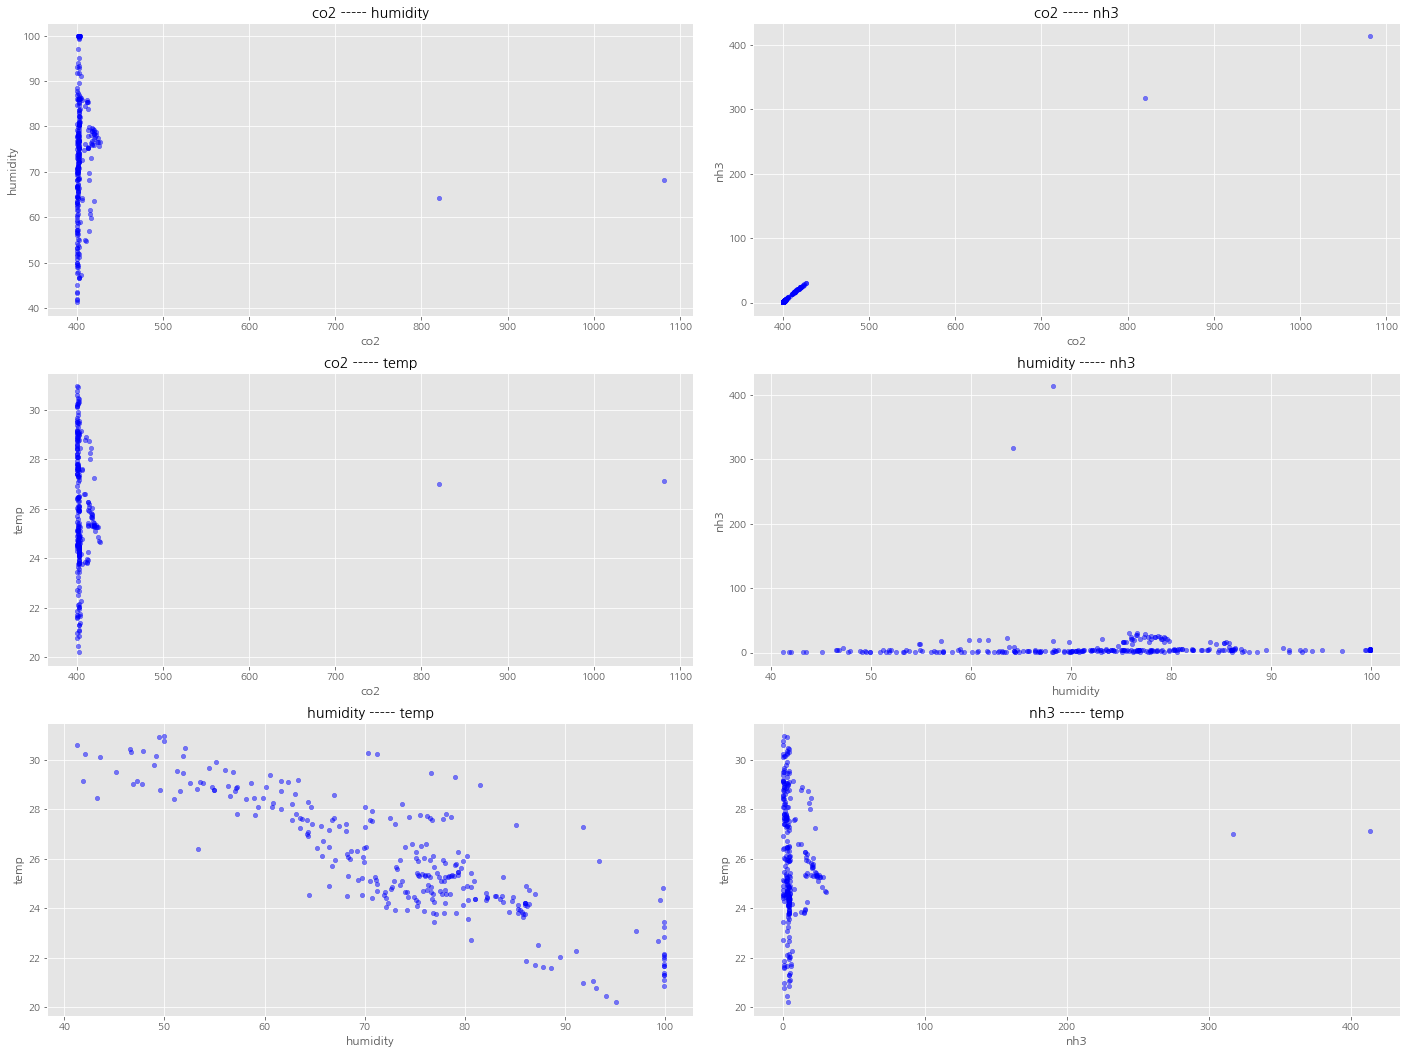

In [53]:
# 처음 1시간 단위로 묶었던 grouped_df_mean을 센서별로 나눠서 제거하지 않고 한번의 dropna를 적용한 결과가 new_data이다. new_data를 사용하여
# scatter 그래프를 통해 시각화 한 결과 (humidity, temp), (co2, nh3)의 상관관계를 눈여겨 볼 필요가 있다.

new_data = grouped_df_mean.dropna(axis=0)
new_data.drop(['year','month','day','hour'], axis=1, inplace=True)

fig, ax = plt.subplots(3, 2, figsize=(20,15))

new_data.plot(x='co2' ,y='humidity', color = 'blue' ,kind = "scatter" ,alpha=0.5, title ='co2 ----- humidity', ax=ax[0, 0])
plt.tight_layout(pad=2, h_pad=1)


new_data.plot(x='co2' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- nh3', ax=ax[0, 1])
plt.tight_layout(pad=2, h_pad=1)
new_data.plot(x='co2' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- temp', ax=ax[1, 0])
plt.tight_layout(pad=2, h_pad=1)

new_data.plot(x='humidity' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- nh3', ax=ax[1, 1])
plt.tight_layout(pad=2, h_pad=1)
new_data.plot(x='humidity' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- temp', ax=ax[2, 0])
plt.tight_layout(pad=2, h_pad=1)
new_data.plot(x='nh3' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='nh3 ----- temp', ax=ax[2, 1])

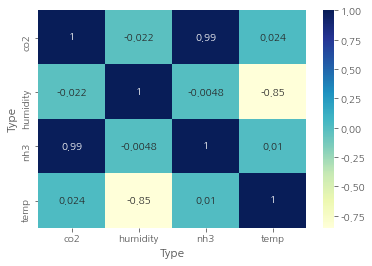

In [54]:
# heatmap 사용 결과
sns.heatmap(new_data.corr(), annot=True, cmap="YlGnBu")
plt.show()